<a href="https://colab.research.google.com/github/MatteoZancanaro-5758278/M_Zancanaro-Programming-BigDataAnalytics/blob/main/Assignment_5/5_01_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.01 Decision Trees

Following up on our linear regression example, we will also run an equivalent using _decision trees_, this time addressing classification.

We'll begin using the inbuilt dataset from scikit-learn. The dataset is for predicting the presence of breast cancer (label=1) or not (label=0). You can get more details here: [https://scikit-learn.org/1.5/datasets/toy_dataset.html](https://scikit-learn.org/1.5/datasets/toy_dataset.html). Much of the code is the same as in the previous example.

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

# import the data
data = load_breast_cancer() #bunch

print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
# create a DataFrame of features(data=num features, features_name=columns)
x_values = pd.DataFrame(data.data, columns=data.feature_names)

from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data(feature scaling --> returns an np.array)
normal_data = scaler.fit_transform(x_values)

# recreate x_values using the scaled data and original feature names
x_values = pd.DataFrame(normal_data, columns=data.feature_names)

# create y value
y_value = pd.DataFrame(data.target, columns=['class'])
y_value = np.ravel(y_value) #converting it back to an array

display(x_values.head())
print(y_value)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

## Train-Test split
As before, our next step will be to split the data:

In [4]:
# split data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size=0.2, random_state=1984, stratify = y_value)

#prunt the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


Parameter ("stratify=y_value"). This part means we make sure there is a propotionate number of each class in our training data. We want to avoid having minimal examples of one of the classes to learn from (as the split is otherwise fully random).

We can confirm this has worked by looking at the size of our different datasets:


*   `X_train` (the $x$ values we use for training) is 455 rows and 30 columns;
*   `X_test` (the $x$ values we use for testing) is 114 rows and 30 columns;
*   `Y_train` (the $Y$ values we use for training) is 455 rows and a single column;
*   `Y_test` (the $Y$ values we use for testing) is 114 rows and a single columns. All seems to be correct!

## Decision Trees
We'll begin with a standard decision tree model WITHOUT adjusting for any hyperparameters. We first need to specify the model:

In [5]:
from sklearn.tree import DecisionTreeClassifier as DTC

#create the model
DTC_algo = DTC()
DTC_algo

DecisionTreeClassifier()

In [6]:
DTC_model = DTC_algo.fit(X_train, Y_train)
DTC_model

DecisionTreeClassifier()

But how does it perform? My professor gave me a metric for free, but I will then have to create some more:

**Accuracy**: Accuracy = TP+TN/(TP+FP+FN+TN)

- Percentage of total correct predictions, great for balanced dataset but misleading for imbalanced data(e.g. if 95% of people are healthy a model that always says "healthy" has 95% accuracy but zero usefulness)

In [7]:
from sklearn.metrics import accuracy_score

#predict the test data
predict = DTC_model.predict(X_test)

#separate the first five predictions and the first five real values in Y_test

for i in range(5):
  print(f"Predicted: {round(predict[i],2)}")
  print(f"Real: {Y_test[i]}")
  print("\n")

print("\n")

print(f"Accuracy {round(accuracy_score(Y_test, predict),2)}")

Predicted: 0
Real: 0


Predicted: 0
Real: 0


Predicted: 0
Real: 0


Predicted: 0
Real: 0


Predicted: 1
Real: 1




Accuracy 0.95


Every classification metric comes from the 2x2 **CONFUSION MATRIX**, combining:

- TP: true positive
- TN: true negative
- FP: false positive
- FN: false negative

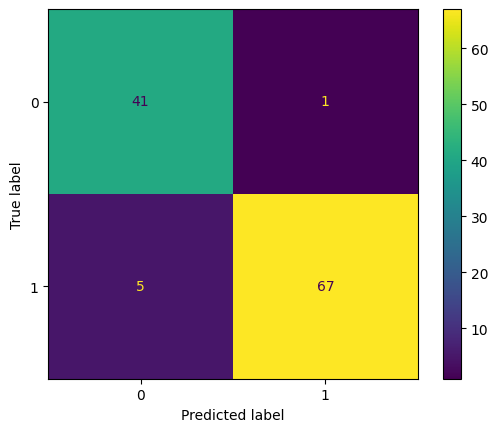

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay as CM

CM.from_predictions(Y_test, predict)

**Precision** = TP/(TP+FP)
- proportion of your positive prediction that were actually correct. If high is a good thing, low means the model "cries wolf" too often

**Recall** = TP/(TP+FN)
- proportion of actual positive that you successfully caught(out of all people who really have cancer, how many did the model find?)
- High recall means few false negative, low recall means the model is missing the real casses(danger)

**F1-Score** = 2*(Precision*Recall)/(Precision+Recall)
- its the harmonic mean of precision adn recall, a balanced metric that's high only if boht precision and recall are high

**Precision & Recall tradeoff**

Focus on positive predictions:

- If the model says “positive” only when 100% sure → few but accurate → high precision, low recall.

- If the model says “positive” very easily → more found, but more wrong → high recall, low precision.

Usually the threshold is 0.5,but if we increase it we will have higher precision(fewer false positive) and lower recall(missing more real positive, more FN)

Micro and Macro avarage:
- Macro: compute metric or each class separately and then take the simple avarage
  - treats all classes equally no matter how many samples they have
  - use when you care about performance on each class **equally**

- Micro: combines all classes togheter and compute metric from total counts
  - gives more weight to large classes
  - when you care about overall accuracy across all samples

Better use Macro for imbalanced classes, for binary classification either works

In [9]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate preciison, recall and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average="micro") #_ ignoring support

print(f"Micro-avaraged Precision: {round(precision,2)}")
print(f"Micro-avaraged Recall: {round(recall,2)}")
print(f"Micro-avaraged F1-Score: {round(f1_score,2)}")
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average="macro")

print(f"Macro-avaraged Precision: {round(precision,2)}")
print(f"Macro-avaraged Recall: {round(recall,2)}")
print(f"Macro-avaraged F1-Score: {round(f1_score,2)}")


Micro-avaraged Precision: 0.95
Micro-avaraged Recall: 0.95
Micro-avaraged F1-Score: 0.95


Macro-avaraged Precision: 0.94
Macro-avaraged Recall: 0.95
Macro-avaraged F1-Score: 0.94


We can also see out tree:

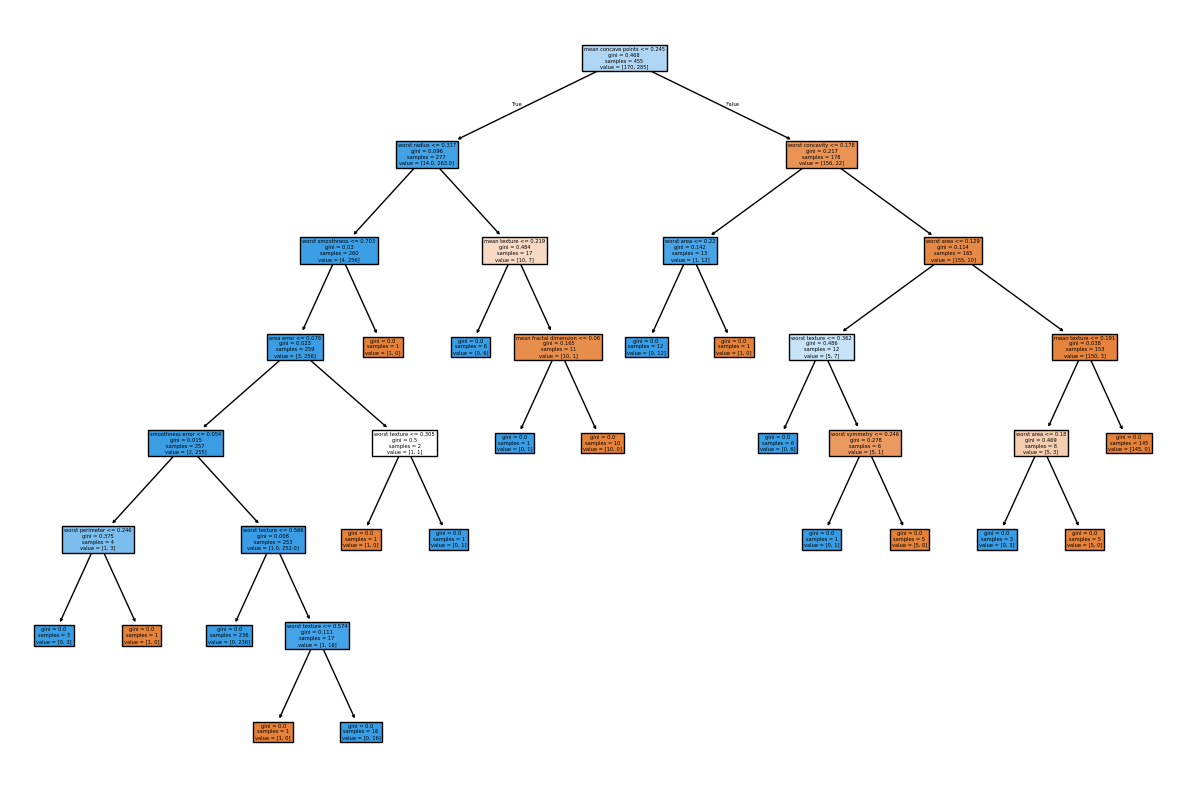

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(DTC_model, filled=True, feature_names=X_train.columns)
plt.show()

We can see it has built a fairly large tree ... maybe it has overfit? Perhaps regularisation will help ...

We can search our hyperparameters and see what would be best:

In example:
- minimize misclassified sample(proportion of the impurity) --> gini/entropy

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

#list of parameters we will tune. some are fixed values and some distributions
tuned_parameters={
    "criterion" : ["gini", "entropy"],
    "max_depth" : randint(3,9), #draw from a uniform distribution between 3 and 15
    "min_samples_split" : randint(3,9),  #draw form a uniform distribution between 2 and 10
    "max_features" : ["sqrt", "log2", None]
}

#we will tune against a f1 macro to find the besst choice
score = "f1_macro" #arbitrary choice

print(f"Tuning hyperparameters for {score}")
print("\n")

#do the search using 5 folds/chunks
clf = RandomizedSearchCV(DTC(),tuned_parameters, cv=5, random_state=1984, scoring=score, n_iter=20, refit=True)

#pass the data to fit/train
clf.fit(X_train, Y_train)

print("Best parameters set found on the training set:")
print(clf.best_params_)



Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_split': 4}


In [12]:
#training the model again using the hyperparameters
DTC_algo = DTC(**clf.best_params_)
DTC_model = DTC_algo.fit(X_train, Y_train)

In [13]:
#and we predict again
predict = DTC_model.predict(X_test)

for i in range(5):
  print(f"Predicted: {round(predict[i],2)}")
  print(f"Real : {Y_test[i]}")
  print("\n")

print("\n")

print(f"Accuracy: {round(accuracy_score(Y_test, predict),2)}")

Predicted: 0
Real : 0


Predicted: 0
Real : 0


Predicted: 0
Real : 0


Predicted: 0
Real : 0


Predicted: 1
Real : 1




Accuracy: 0.95


Micro-avaraged Precision: 0.95
Micro-avaraged Recall: 0.95
Micro-avaraged F1-Score: 0.95


Macro-avaraged Precision: 0.94
Macro-avaraged Recall: 0.95
Macro-avaraged F1-Score: 0.94




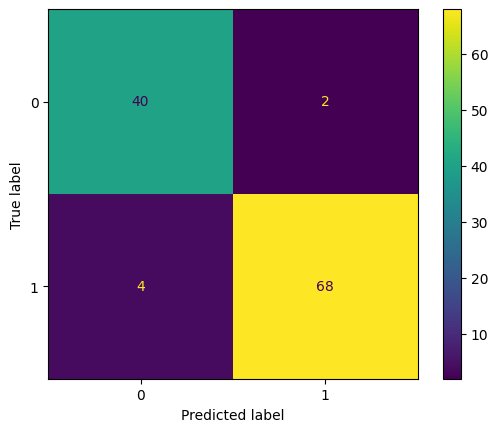

In [14]:
#create a confusion matrix
CM.from_predictions(Y_test,predict)

precision , recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average= "micro")

print(f"Micro-avaraged Precision: {round(precision,2)}")
print(f"Micro-avaraged Recall: {round(recall,2)}")
print(f"Micro-avaraged F1-Score: {round(f1_score,2)}")
print("\n")

precision , recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average = "macro")

print(f"Macro-avaraged Precision: {round(precision,2)}")
print(f"Macro-avaraged Recall: {round(recall,2)}")
print(f"Macro-avaraged F1-Score: {round(f1_score,2)}")
print("\n")

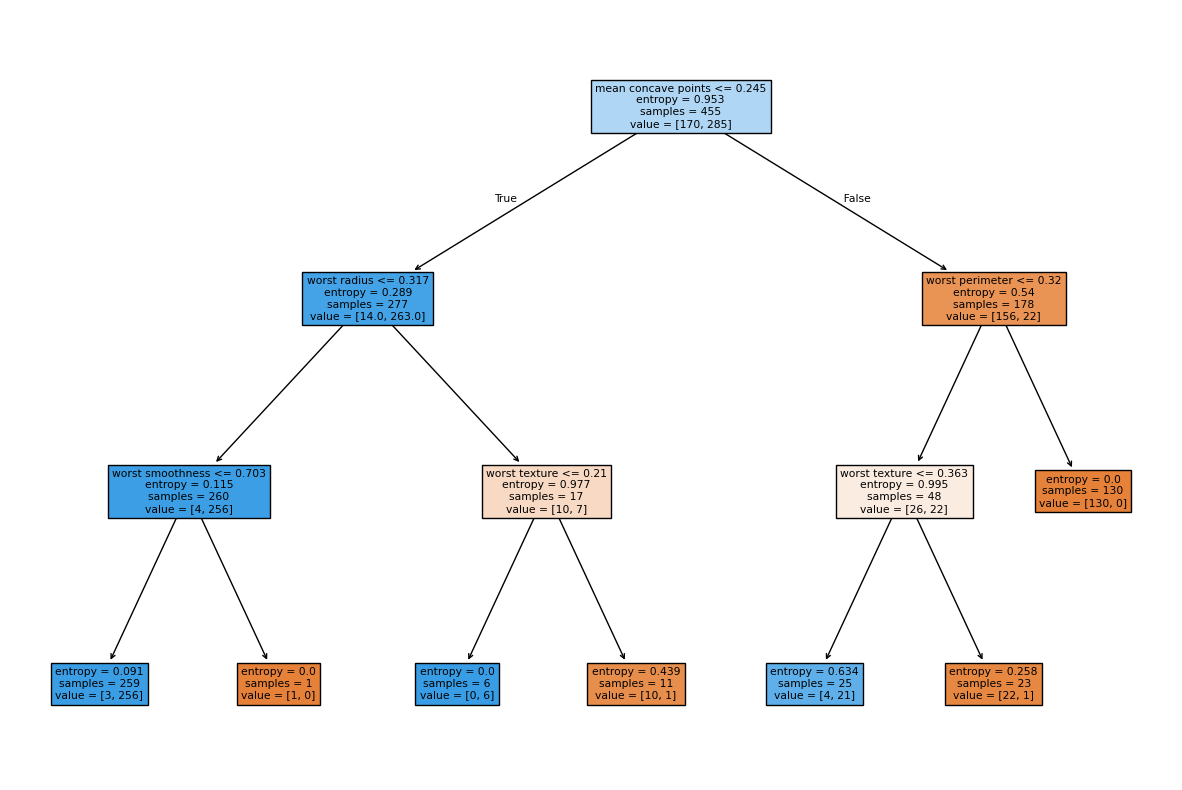

In [15]:
plt.figure(figsize=(15, 10))
plot_tree(DTC_model, filled=True, feature_names=X_train.columns)
plt.show()

#TASK

Given that this is a medical domain, possibly a better metric to optimise against would be recall. Reoptimise the model according to macro recall and evaluate the results.

In [17]:
x_values.shape

(569, 30)

Trying also new parameters settings:

- min samples leafs: number of samples that must be in each final leaf. More strict than min sample split who covers the number needed in a node before split.

- max depth: log2(n_samples) or sqrt(n_features)+2.

- pruining: when growing a tree, each split reduces error but also increases complexity. Pruining find balance between tree accuracy and simplicity
  - we need to choose the α small to keep many branches and large α to reamove weak branches.
  - logspace(a, b, N) generates N numbers between 10^a and 10^b.
    - standard logspace(-5,-1,10)




If i see overfitting(train>test):
- ↑ min_samples_leaf, ↑ min_samples_split, ↓ max_depth, ↑ ccp_alpha

If i see underfitting(both low):
- ↓ min_samples_leaf, ↓ min_samples_split, ↑ max_depth, ↓ ccp_alpha

In [28]:
from numpy import logspace

heuristic = int(np.log2(x_values.shape[0]))

tuned_parameters_2={
    "criterion" : ["gini", "entropy"],
    "max_depth" : randint(1, heuristic+3),
    "min_samples_split" : randint(2,20),
    "min_samples_leaf" : randint(1,10),
    "max_features" : ["sqrt", "log2", None],
    "ccp_alpha" : logspace(-5,-1,10)
}

score = "recall"

print(f"Tuning hyperparameters for {score}")
print("\n")

clf_2 = RandomizedSearchCV(DTC(), tuned_parameters_2, cv=5, random_state=1984, scoring=score, n_iter=20, refit=True)

clf_2.fit(X_train,Y_train)

print(f"Best parameters set found on the training set:")
print(clf_2.best_params_)



Tuning hyperparameters for recall


Best parameters set found on the training set:
{'ccp_alpha': np.float64(0.0016681005372000592), 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 14}


In [30]:
DTC_algo = DTC(**clf_2.best_params_)
DTC_model = DTC_algo.fit(X_train, Y_train)

In [32]:
predict = DTC_model.predict(X_test)

for i in range (5):
  print(f"Predicted {round(predict[i],2)}")
  print(f"Real {Y_test[i]}")
  print("\n")

print("\n")

print(f"Accuracy {round(accuracy_score(Y_test, predict),2)}")

Predicted 0
Real 0


Predicted 0
Real 0


Predicted 0
Real 0


Predicted 0
Real 0


Predicted 1
Real 1




Accuracy 0.96


Micro-avaraged Precision: 0.96
Micro-avaraged Recall: 0.96
Micro-avaraged F1-Score: 0.96


Macro-avaraged Precision: 0.95
Macro-avaraged Recall: 0.96
Macro-avaraged F1-Score: 0.95




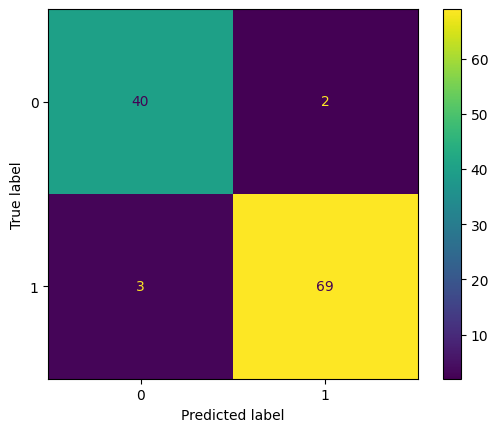

In [35]:
CM.from_predictions(Y_test, predict)

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average="micro")

print(f"Micro-avaraged Precision: {round(precision,2)}")
print(f"Micro-avaraged Recall: {round(recall,2)}")
print(f"Micro-avaraged F1-Score: {round(f1_score,2)}")
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average="macro")

print(f"Macro-avaraged Precision: {round(precision,2)}")
print(f"Macro-avaraged Recall: {round(recall,2)}")
print(f"Macro-avaraged F1-Score: {round(f1_score,2)}")
print("\n")

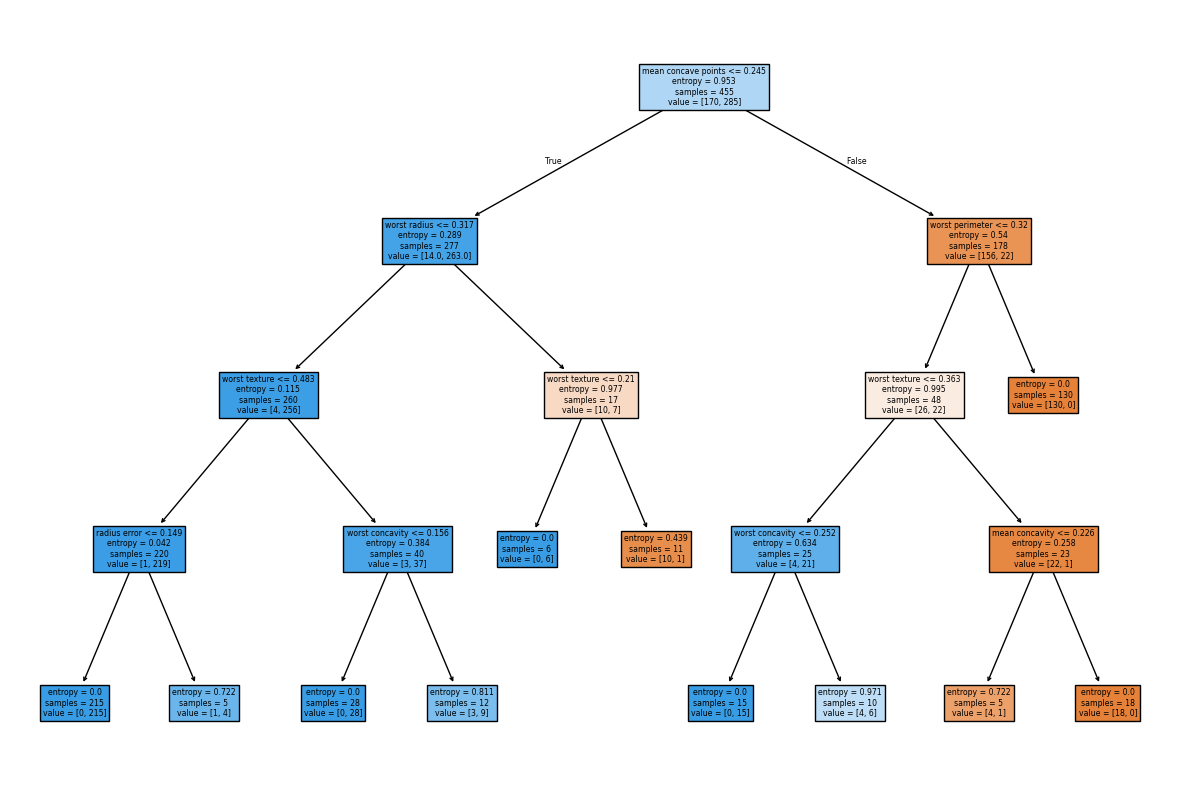

In [36]:
plt.figure(figsize=(15, 10))
plot_tree(DTC_model, filled=True, feature_names=X_train.columns)
plt.show()